In [1]:
import collections
from collections import defaultdict
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from bs4 import BeautifulSoup
import requests

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

# Data collection

In [2]:
BASE_URL = "https://games.crossfit.com/workouts/open/{year}/"
BASE_URL_WITH_WORKOUT_NUM = "https://games.crossfit.com/workouts/open/{year}/{workout_num}?division=1"
BASE_URL_WITH_WORKOUT_NUM_OLD = "https://games.crossfit.com/workouts/open/{year}/#workoutsTab{workout_num}"


In [3]:
def main():
    years = range(2011, 2023 + 1)
    d = defaultdict(collections.Counter)
    d1 = defaultdict(dict)
    for year in years:
        #print(f"Year = {year}")
        resp = requests.get(BASE_URL.format(year=year))
        resp.raise_for_status()
        parsed_html = BeautifulSoup(resp.text, "html.parser")

        if year < 2017:
            data = parsed_html.body.findAll('div', attrs={'class': 'tabs js-workout-tabs'})
        else:
            data = parsed_html.body.findAll('div', attrs={'class': 'ordinals'})

        links = []
        for div in data:
            links = div.findAll('a')
        workout_nums = range(1, len(links) + 1)
        for workout_num in workout_nums:
            #print(f"workout = {workout_num}")
            if year < 2017:
                resp = requests.get(BASE_URL_WITH_WORKOUT_NUM_OLD.format(year=year, workout_num=workout_num))
                resp.raise_for_status()
                parsed_html = BeautifulSoup(resp.text, "html.parser")
                section = parsed_html.body.find('li', {'id': f'workoutsTab{workout_num}'})
                text = section.find('div', attrs={'class': 'drupal-inline-reset'}).text
                text = text.lower().split("women")[0]
            else:
                resp = requests.get(BASE_URL_WITH_WORKOUT_NUM.format(year=year, workout_num=workout_num))
                resp.raise_for_status()
                parsed_html = BeautifulSoup(resp.text, "html.parser")
                text = parsed_html.body.find('div', attrs={'class': 'exercises'}).text
            d1[year][workout_num] = text
            # for line in text.splitlines():
            #     movement = find_movement(line)
            #     if movement:
            #         d[year][movement] += 1
    with open("opens_raw.json", "w") as f:
        f.write(json.dumps(d1, indent=2))
    print("End")


def find_movement(line):
    for movement in all_movements:
        if movement in line.lower():
            return movement
        singular = movement.rstrip("s")

        if singular in line.lower():
            return movement


if __name__ == '__main__':
    main()

End


# Initialization the dictionary of movements 

In [4]:
# Initialization of movements groups 
mapping = {
    #box jumps
    "box jumps": "box jumps",
    "box jump-overs": "box jumps",
    
    #handstand push-ups
    "strict handstand push-ups": "handstand push-ups",
    "handstand push-ups": "handstand push-ups",
    
    #squats
    "overhead squats": "squats",
    "dumbbell squats": "squats",
    "single-leg squats": "squats",
    "front squats": "squats",
    
    # pull-ups
    "pull-ups": "pull-ups",
    "chest-to-bar pull-ups": "pull-ups",   
    
    # snatches
    "snatches": "snatches",
    "ground-to-overheads": "snatches",
    "dumbbell snatches": "snatches",
    "squat snatches": "snatches",

    # thrusters
    "thrusters": "thrusters",
    "dumbbell thrusters": "thrusters",

    # muscle ups
    "muscle-ups": "muscle-ups",
    "bar muscle-ups": "muscle-ups",
    "ring muscle-ups": "muscle-ups",

    # dumbbell overhead lunge
    "dumbbell overhead lunge": "lunge",
    "overhead walking lunge": "lunge",
    "weighted walking lunge": "lunge",

    # burpees
    "burpees": "burpees",
    "bar-facing burpees": "burpees",
    "burpee box jump-overs": "burpees",
    "burpee pull-ups": "burpees",

    # clean
    "cleans": "clean",
    "hang clean": "clean",
    "power cleans": "clean",
    "squat cleans": "clean",
}

#Regular expessions dictionaries to extract movements data

mapping_regexp_short = {
    "snatches": r"snatch",
    "deadlifts": r"deadlift",
    "pull-ups": r"pull[\s\-]up",
    "thrusters": r"thruster",
    "muscle-ups": r"muscle[\s\-]up",
    "row": r"row",
    "cleans": r"clean",
    "jerk": r"jerk",
    "box jumps": r"box jump",
    "burpees": r"burpees",
}

mapping_regexp_long = {
    "bar muscle-ups": r"bar muscle[\s\-]up",
    "bar-facing burpees": r"bar[\s\-]facing burpee",
    "box jump-overs": r"\d+ box jump[\s\-]over",
    "burpee box jump-overs": r"burpee box jump[\s\-]over",
    "burpee pull-ups": r"burpee pull[\s\-]up",
    "chest-to-bar pull-ups": r"chest[\s\-]to[\s\-]bar pull[\s\-]up",
    "clean and jerks": r"clean and jerk",
    "double-unders": r"double[\s\-]under",
    "dumbbell box step-ups": r"dumbbell box step[\s\-]up",
    "dumbbell overhead lunge": r"dumbbell overhead lunge",
    "dumbbell snatches": r"dumbbell snatche",
    "dumbbell squats": r"dumbbell squat",
    "dumbbell thrusters": r"dumbbell thruster",
    "front squats": r"front squat",
    "ground-to-overheads": r"ground-to-overhead",
    "handstand push-ups": r"handstand push[\s\-]up",
    "handstand walk": r"handstand walk",
    "hang clean": r"hang clean",
    "overhead squats": r"overhead squat",
    "overhead walking lunge": r"overhead walking lunge",
    "power cleans": r"power clean",
    "ring muscle-ups": r"ring muscle[\s\-]up",
    "shuttle runs": r"shuttle run",
    "single-leg squats": r"single[\s\-]leg squat",
    "squat cleans": r"squat clean",
    "squat snatches": r"squat snatche",
    "strict handstand push-ups": r"strict handstand push[\s\-]up",
    "toes-to-bars": r"toes[\s\-]to[\s\-]bar",
    "wall walks": r"wall walk",
    "wall-ball shots": r"wall[\s\-]ball",
    "weighted walking lunge": r"weighted walking lunge",
}

# Reading data from JSON file

In [5]:
with open('opens_raw.json', 'r') as f:
    data = json.load(f)
    
df_raw = pd.DataFrame(data)

In [6]:
df_raw.head(2)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,\n\nmen - includes masters men up to 54 years ...,\n\ncomplete as many reps as possible in 7 min...,\n\nmen - includes masters men up to 54 years ...,\n\nmen - includes masters men up to 54 years ...,\n\n\ncomplete as many rounds and reps as poss...,\n\ncomplete as many rounds and reps as possib...,\nWorkout 17.1\r\nFor time:\r\n10 dumbbell sna...,\nWorkout 18.1\nComplete as many rounds as pos...,\nWorkout 19.1\nComplete as many rounds as pos...,\n10 rounds for time of:\r\n8 ground-to-overhe...,\nFor time:\n1 wall walk\r\n10 double-unders\r...,\nComplete as many rounds as possible in 15 mi...,\nComplete as many reps as possible in 14 minu...
2,\n\nmen - includes masters men up to 54 years ...,\n\nmen - includes masters men up to 54 years ...,\n\nmen - includes masters men up to 54 years ...,\n\nevery 3 minutes for as long as possible co...,\n\nevery 3 minutes for as long as possible co...,"\n\nbeginning on a 4-minute clock, complete as...",\nComplete as many rounds and reps as possible...,\nWorkout 18.2\n1-2-3-4-5-6-7-8-9-10 reps for ...,\nWorkout 19.2\nBeginning on an 8-minute clock...,\nComplete as many rounds as possible in 20 mi...,\nFor time:\n10 dumbbell snatches\r\n15 burpee...,\n1-2-3-4-5-6-7-8-9-10-9-8-7-6-5-4-3-2-1 reps ...,\n23.2A:\nComplete as many reps as possible in...


In [9]:
df=pd.DataFrame(df_raw.unstack()).reset_index()
df.rename(columns={'level_0':'year', 'level_1':'workout_number',0:'description'}, inplace=True)

print(df.head(5))
print(df.shape)

   year workout_number                                        description
0  2011              1  \n\nmen - includes masters men up to 54 years ...
1  2011              2  \n\nmen - includes masters men up to 54 years ...
2  2011              3  \n\nmen - includes masters men up to 54 years ...
3  2011              4  \n\nmen - includes masters men up to 54 years ...
4  2011              5  \n\nmen - includes masters men up to 54 years ...
(78, 3)


## Data cleaning

In [10]:
df.isnull().values.any() 

True

In [11]:
df.isnull().sum()

year               0
workout_number     0
description       17
dtype: int64

In [13]:
# remove null description rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(61, 3)


## Data preprocessing

In [14]:
def extract_movement(x):
    """
    function to extract the list of unique movements from each workout desctription text data
    """
    
    txt=x.replace('\xa0',' ').replace('   ','').replace('  ','')
    txt=txt.lower()
    str_list=txt.split("\n")## Data cleaning
    movements=[]
    for line in str_list:
        matched = False
        for l,reg_exp_l in mapping_regexp_long.items():
            if re.search(reg_exp_l, line):
                movements.append(l)
                matched = True
                
        if matched==False:
            for s,reg_exp_s in mapping_regexp_short.items():
                if re.search(reg_exp_s, line):
                    movements.append(s)        
             
    return set(movements)

In [15]:
#Extract the list of unique movements from description
df['movements']=df['description'].apply(extract_movement)

In [16]:
print("Total numbers of workouts analysed: ", df.shape[0])

Total numbers of workouts analysed:  61


In [19]:
# check if we have unrecognized data 
if df[df['movements']==set()].shape[0]!=0:
    print("\033[91m {}\033[00m".format("Unrecognized descriptions:"))
    print("\033[91m {}\033[00m".format(df[df['movements']==set()]))
else:
    print("\033[92m {}\033[00m" .format("All the data has been acknowledged."))

 All the data has been acknowledged.


In [20]:
# Transform each element of a set to a row
df_final= df.explode('movements').reset_index(drop=True)
df_final.head()

,year,workout_number,description,movements
0,2011,1,\n\nmen - includes masters men up to 54 years ...,snatches
1,2011,1,\n\nmen - includes masters men up to 54 years ...,double-unders
2,2011,2,\n\nmen - includes masters men up to 54 years ...,deadlifts
3,2011,2,\n\nmen - includes masters men up to 54 years ...,box jumps
4,2011,3,\n\nmen - includes masters men up to 54 years ...,jerk


In [21]:
df_final.drop(columns='description', inplace=True)


In [22]:
# Mapping each movement to movement_group
df_final['movement_group'] = df_final['movements'].replace(mapping)

In [24]:
df_final.head()

,year,workout_number,movements,movement_group
0,2011,1,snatches,snatches
1,2011,1,double-unders,double-unders
2,2011,2,deadlifts,deadlifts
3,2011,2,box jumps,box jumps
4,2011,3,jerk,jerk


## Top 20 movements by the number of appearances in Open workouts

In [25]:
df_grouped=df_final.groupby(by=['movements'])['workout_number'].count().reset_index()

df_grouped.sort_values(by='workout_number',inplace=True, ascending=False)
df_grouped.head()

,movements,workout_number
11,double-unders,13
37,toes-to-bars,12
36,thrusters,12
7,chest-to-bar pull-ups,11
10,deadlifts,10


In [26]:
# select top 20 movements 
df_top_20=df_grouped[0:20].reset_index(drop=True)


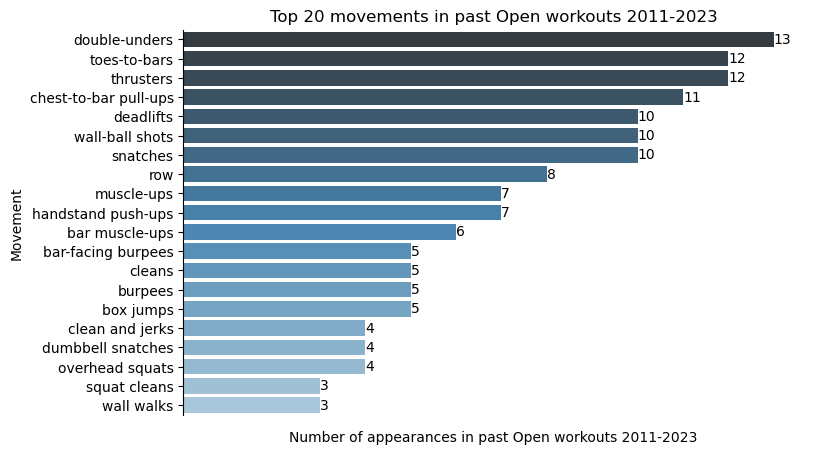

In [27]:
# plotting data
plt.figure(figsize=(8,5))
df_top_20.sort_values('workout_number',inplace=True, ascending=False)
palette = sns.color_palette("Blues_d",n_colors=df_top_20.shape[0])
palette.reverse()


ax = sns.barplot(y=df_top_20['movements'], x=df_top_20['workout_number'], palette=palette, legend=False)
ax.set(xlabel='Number of appearances in past Open workouts 2011-2023', ylabel='Movement', 
       title='Top 20 movements in past Open workouts 2011-2023')

for i in ax.containers:
    ax.bar_label(i,)

ax.xaxis.set_ticklabels([])    
ax.tick_params(bottom=False)

#ax.set(xlabel=None)
sns.despine(bottom=True)
#plt.grid()
plt.show()


## Top 10 movement groups by the number of appearances in Open workouts

In [28]:
df_grouped_movement_group=df_final.groupby(by=['movement_group'])['workout_number'].count().reset_index()
df_grouped_movement_group.sort_values(by='workout_number',inplace=True, ascending=False)
df_grouped_movement_group_top10=df_grouped_movement_group[:10].reset_index(drop=True)
df_grouped_movement_group_top10

,movement_group,workout_number
0,snatches,16
1,muscle-ups,14
2,double-unders,13
3,thrusters,13
4,burpees,13
5,clean,12
6,toes-to-bars,12
7,pull-ups,12
8,wall-ball shots,10
9,deadlifts,10


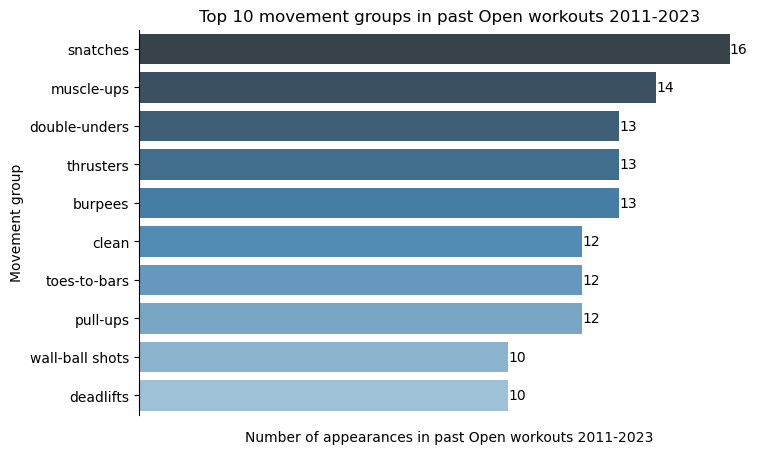

In [29]:
# plotting data
plt.figure(figsize=(8,5))
df_grouped_movement_group_top10.sort_values('workout_number',inplace=True, ascending=False)
palette = sns.color_palette("Blues_d",n_colors=df_grouped_movement_group_top10.shape[0])
palette.reverse()


ax = sns.barplot(y=df_grouped_movement_group_top10['movement_group'], x=df_grouped_movement_group_top10['workout_number'], palette=palette)
ax.set(xlabel='Number of appearances in past Open workouts 2011-2023', ylabel='Movement group', 
       title='Top 10 movement groups in past Open workouts 2011-2023')

for i in ax.containers:
    ax.bar_label(i,)

ax.xaxis.set_ticklabels([])    
ax.tick_params(bottom=False)

#ax.set(xlabel=None)
sns.despine(bottom=True)
#plt.grid()
plt.show()

## The most recent combination of two movement groups in one workout

In [37]:
df_sets=df_final[['year','workout_number','movement_group']]
df_sets.shape

(172, 3)

In [38]:
df_sets.head()

,year,workout_number,movement_group
0,2011,1,snatches
1,2011,1,double-unders
2,2011,2,deadlifts
3,2011,2,box jumps
4,2011,3,jerk


In [43]:
df_sets_cleaned=df_sets.copy()
#df_sets.drop_duplicates().reset_index(drop=True)
df_sets_cleaned.shape

(172, 3)

In [44]:
df_sets_cleaned.head()

,year,workout_number,movement_group
0,2011,1,snatches
1,2011,1,double-unders
2,2011,2,deadlifts
3,2011,2,box jumps
4,2011,3,jerk


In [45]:
df_sets_cleaned_grouped=pd.DataFrame(df_sets_cleaned.groupby(['year','workout_number'])['movement_group'].agg(set).reset_index(drop=True))
df_sets_cleaned_grouped


,movement_group
0,"{snatches, double-unders}"
1,"{deadlifts, box jumps}"
2,"{clean, jerk}"
3,"{burpees, squats, muscle-ups}"
4,"{toes-to-bars, clean, wall-ball shots}"
...,...
56,"{deadlifts, burpees}"
57,"{pull-ups, double-unders, muscle-ups, thrusters}"
58,"{toes-to-bars, row, clean, wall-ball shots, mu..."
59,"{burpees, shuttle runs, thrusters}"


In [47]:
df_sets_cleaned_grouped['movements_count_in_set']=df_sets_cleaned_grouped['movement_group'].apply(lambda x: len(x))
df_sets_cleaned_grouped

,movement_group,movements_count_in_set
0,"{snatches, double-unders}",2
1,"{deadlifts, box jumps}",2
2,"{clean, jerk}",2
3,"{burpees, squats, muscle-ups}",3
4,"{toes-to-bars, clean, wall-ball shots}",3
...,...,...
56,"{deadlifts, burpees}",2
57,"{pull-ups, double-unders, muscle-ups, thrusters}",4
58,"{toes-to-bars, row, clean, wall-ball shots, mu...",5
59,"{burpees, shuttle runs, thrusters}",3


In [51]:
df_sets_2=df_sets_cleaned_grouped[df_sets_cleaned_grouped['movements_count_in_set']==2]
df_sets_2['movement_group']=df_sets_2['movement_group'].astype(str)

df_sets_2_grouped=df_sets_2.groupby('movement_group').count().reset_index()
df_sets_2_grouped.sort_values(by='movements_count_in_set', ascending=False, inplace=True)
df_sets_2_grouped.reset_index(drop=True)

,movement_group,movements_count_in_set
0,"{'pull-ups', 'thrusters'}",5
1,"{'burpees', 'snatches'}",4
2,"{'deadlifts', 'box jumps'}",3
3,"{'snatches', 'double-unders'}",2
4,"{'burpees', 'thrusters'}",2
5,"{'pull-ups', 'squats'}",2
6,"{'box jumps', 'toes-to-bars'}",1
7,"{'toes-to-bars', 'clean and jerks'}",1
8,"{'thrusters', 'row'}",1
9,"{'thrusters', 'double-unders'}",1


In [52]:
df_sets_3=df_sets_cleaned_grouped[df_sets_cleaned_grouped['movements_count_in_set']==3]
df_sets_3['movement_group']=df_sets_3['movement_group'].astype(str)

df_sets_3_grouped=df_sets_3.groupby('movement_group').count().reset_index()
df_sets_3_grouped.sort_values(by='movements_count_in_set', ascending=False, inplace=True)
df_sets_3_grouped

,movement_group,movements_count_in_set
12,"{'wall-ball shots', 'double-unders', 'muscle-u...",3
6,"{'deadlifts', 'handstand walk', 'handstand pus...",2
9,"{'toes-to-bars', 'clean', 'double-unders'}",2
0,"{'box jumps', 'squats', 'clean and jerks'}",1
1,"{'burpees', 'shuttle runs', 'thrusters'}",1
2,"{'burpees', 'snatches', 'muscle-ups'}",1
3,"{'burpees', 'squats', 'muscle-ups'}",1
4,"{'clean', 'burpees', 'squats'}",1
5,"{'deadlifts', 'clean', 'jerk'}",1
7,"{'pull-ups', 'burpees', 'lunge'}",1
